# Multiple Models Analysis

In [1]:
# Import Everything we need

from DLAnalysis.Scan import *
from DLAnalysis.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


In [2]:
# Choose the Models to look at
import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels.Run.1/*"))
ModelDirs=glob.glob("TrainedModels/*.1")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [3]:
# Prep the Models

# Rename the Models using Width and Depth
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 

Historical Parameters: ['All_Width', 'All_History.val_acc', 'All_History.loss', 'All_History.val_loss', 'All_History.acc', 'All_Depth']


In [4]:
MyModels[0].MetaData.keys()

['Loss',
 'History',
 'Name',
 'All_Depth',
 'All_History.loss',
 'Width',
 'Depth',
 'All_History.acc',
 'FinalScore',
 'OutDir',
 'Epochs',
 'Optimizer',
 'InitialScore',
 'InputMetaData',
 'All_Width',
 'All_History.val_acc',
 'OptimizerClass',
 'All_History.val_loss',
 'Metrics',
 'InputDir',
 'OptimizerConfig',
 'Configuration']

In [5]:
# Get a List of all numbers stored in MetaData
print "Available Parameters:", GetGoodParams(MyModels)

Available Parameters: ['Width', 'Depth', 'Epochs']


In [6]:
MyModels[0].MetaData.keys()

['Loss',
 'History',
 'Name',
 'All_Depth',
 'All_History.loss',
 'Width',
 'Depth',
 'All_History.acc',
 'FinalScore',
 'OutDir',
 'Epochs',
 'Optimizer',
 'InitialScore',
 'InputMetaData',
 'All_Width',
 'All_History.val_acc',
 'OptimizerClass',
 'All_History.val_loss',
 'Metrics',
 'InputDir',
 'OptimizerConfig',
 'Configuration']

In [7]:
# Make a Table of all relevant parameters, sort by 1,2,then 0 columns.
# Note: Parameters are optional... but the columns and rows will be not optimally sorted.
ScanTable(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

Model Name           Width    Depth    Epochs  Ele_AUC         Pi0_AUC         ChPi_AUC        Gamma_AUC
-----------------  -------  -------  --------  --------------  --------------  --------------  --------------
Width=32 Depth=1        32        1       134  N/A             N/A             N/A             N/A
Width=32 Depth=2        32        2       134  N/A             N/A             N/A             N/A
Width=32 Depth=3        32        3       100  N/A             N/A             N/A             N/A
Width=32 Depth=4        32        4       178  0.70234730928   0.697212219746  0.882445111111  0.646579315712
Width=64 Depth=1        64        1       120  N/A             N/A             N/A             N/A
Width=64 Depth=2        64        2       132  N/A             N/A             N/A             N/A
Width=64 Depth=3        64        3       222  0.979110577085  0.91918827045   0.996908842544  0.91540029981
Width=64 Depth=4        64        4       177  0.880672768731  0.788009

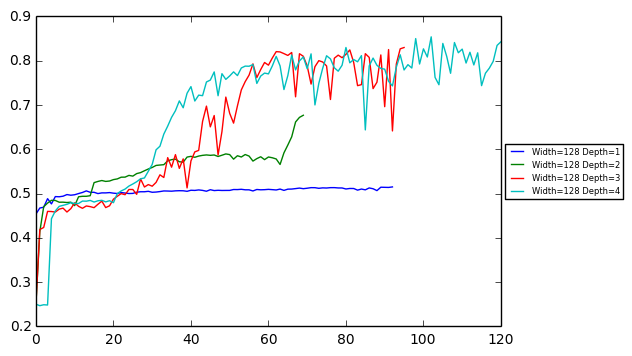

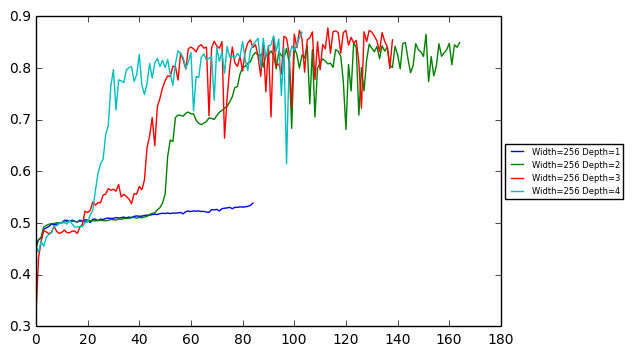

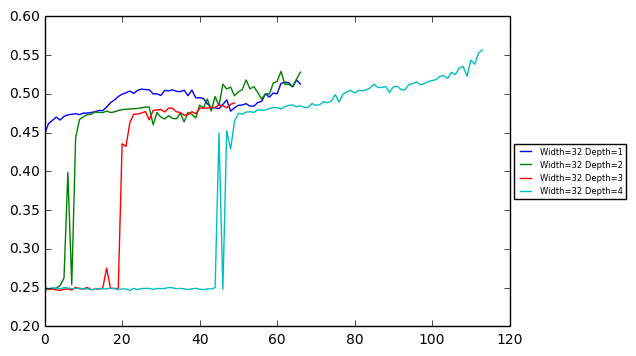

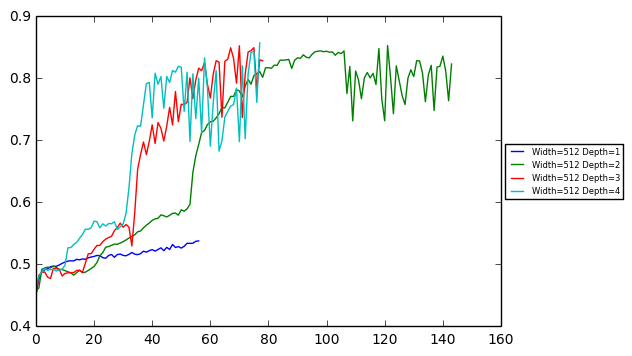

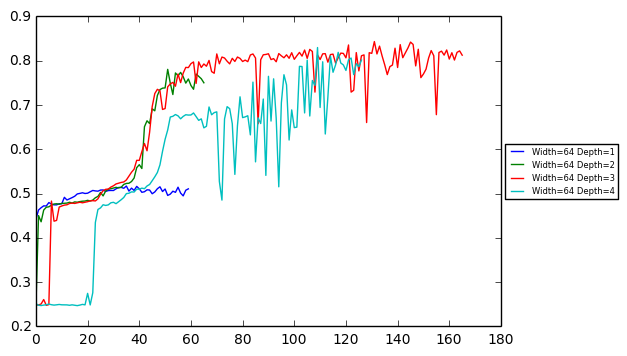

In [8]:
# Plot Historical MetaData... put 4 models per plot
#PlotMetaDataMany(MyModels,4,["History","val_loss"],loc="center left")
PlotMetaDataMany(MyModels,4,["All_History.val_acc"],loc="center left")

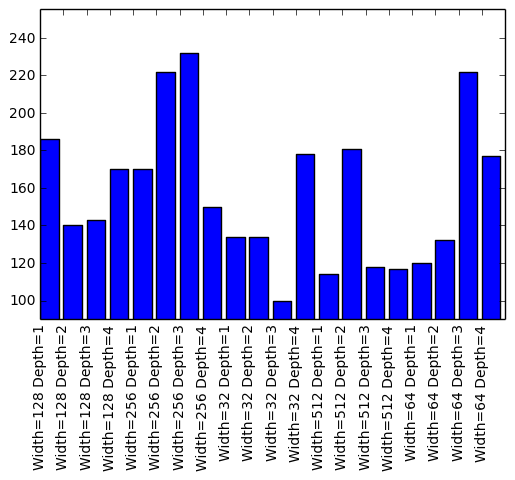

In [9]:
# Compare Number of Epochs each model ran (only last run)
PlotMetaData(MyModels,["Epochs"])

In [10]:
MyModels[1].MetaData.keys()

['Loss',
 'History',
 'Name',
 'All_Depth',
 'All_History.loss',
 'Width',
 'Depth',
 'All_History.acc',
 'FinalScore',
 'OutDir',
 'Epochs',
 'Optimizer',
 'InitialScore',
 'InputMetaData',
 'All_Width',
 'All_History.val_acc',
 'OptimizerClass',
 'All_History.val_loss',
 'Metrics',
 'InputDir',
 'OptimizerConfig',
 'Configuration']

In [11]:
# Compare AUCs for all models
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(MyModels,[p],log=True)
    plt.show()

Ele_AUC


KeyError: 'Ele_AUC'

In [ ]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

In [ ]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData(MyModels,["All_History.val_loss"],loc="center left")